# IMDB dataset

#### Classify movie reviews as either positive or negative based on the words used

The x data is a list of indices in the list of all words for each word that appears <br>
The y data is a 0 if the review was negative and 1 if the review was positive <br>

This is a binary classification problem

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as graph

graph.style.use('fivethirtyeight')

from keras import models
from keras import layers
from keras.datasets import imdb
from sklearn.preprocessing import StandardScaler

/home/harshil/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Train test split

n_words = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_words)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


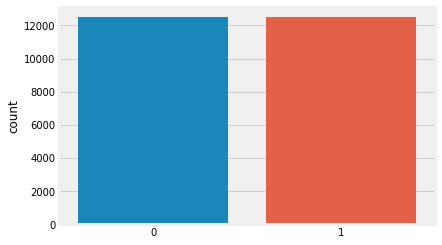

In [3]:
sns.countplot(y_train)
graph.show()

In [4]:
# Convert the list of indices to a feature set n_words long with a zero or one indicating prescence of the words

def vectorize_data(data, dimension=n_words):
    results = np.zeros((len(data), dimension))
    for i, seq in enumerate(data):
        results[i, seq] = 1
    return results

x_train = vectorize_data(x_train)
x_test = vectorize_data(x_test)

val_size = 10000
x_val_test, y_val_test, x_val_train, y_val_train = x_train[:val_size], y_train[:val_size], x_train[val_size:], y_train[val_size:] 

In [5]:
# Train model on validation

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_val_train, y_val_train, epochs=5, batch_size=512, validation_data=(x_val_test, y_val_test))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 0s 29us/step - loss: 0.6340 - acc: 0.6589 - val_loss: 0.5233 - val_acc: 0.7798
Epoch 2/5
15000/15000 [==============================] - 0s 15us/step - loss: 0.4362 - acc: 0.8182 - val_loss: 0.3831 - val_acc: 0.8385
Epoch 3/5
15000/15000 [==============================] - 0s 14us/step - loss: 0.3459 - acc: 0.8563 - val_loss: 0.3481 - val_acc: 0.8537
Epoch 4/5
15000/15000 [==============================] - 0s 16us/step - loss: 0.3142 - acc: 0.8696 - val_loss: 0.3413 - val_acc: 0.8582
Epoch 5/5
15000/15000 [==============================] - 0s 15us/step - loss: 0.3004 - acc: 0.8771 - val_loss: 0.3484 - val_acc: 0.8557


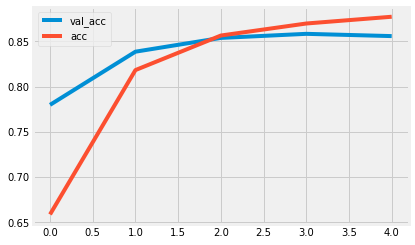

In [6]:
for key, value in history.history.items():
    if 'acc' in key:
        graph.plot(value, label=key)
        graph.legend()
graph.show()

In [7]:
# Train model on full training set 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
25000/25000 [==============================] - 0s 18us/step - loss: 0.5334 - acc: 0.7431
Epoch 2/5
25000/25000 [==============================] - 0s 12us/step - loss: 0.3764 - acc: 0.8465
Epoch 3/5
25000/25000 [==============================] - 0s 12us/step - loss: 0.3321 - acc: 0.8622
Epoch 4/5
25000/25000 [==============================] - 0s 12us/step - loss: 0.3180 - acc: 0.8672
Epoch 5/5
25000/25000 [==============================] - 0s 12us/step - loss: 0.3103 - acc: 0.8694


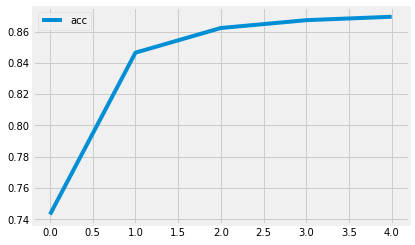

In [8]:
for key, value in history.history.items():
    if 'acc' in key:
        graph.plot(value, label=key)
        graph.legend()
graph.show()

In [9]:
# Test model
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 36us/step


[0.3279200676250458, 0.86036]